In [3]:
execfile('/Users/annaboehle/research/code/orbits/kepler.py')
import plot_rv_curve as plt_rv
reload(plt_rv)

<module 'plot_rv_curve' from '/Users/annaboehle/research/code/rv/plot_rv_curve.pyc'>

In [2]:
#eccentric_anamoly(np.arange(0,10,0.001), 10, 12, 0.8)

In [659]:
t_arr = np.arange(0,100,5.)
f_old = radvel.orbit.true_anomaly(t_arr, 40, 1000, 0.5)

print t_arr[11]

E = solve_kepler_eqn(t_arr, 0.5, 1000, 40)
f_new = true_anomaly(E,0.1)


print f_old-f_new
print 

55.0
[-0.27514697 -0.24781238 -0.21799062 -0.18577805 -0.15135868 -0.1150137
 -0.07712458 -0.03816718  0.          0.03816718  0.07712458  0.1150137
  0.15135868  0.18577805  0.21799062  0.24781238  0.27514697  0.29997234
  0.32232577  0.34228934]



## Plot E

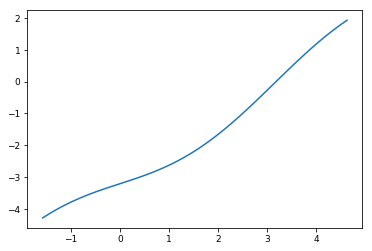

In [185]:
t_test = 550.0

E_arr = np.arange(-np.pi/2., 3*np.pi/2., 0.1)
plt.plot(E_arr, kepler_eqn(E_arr, np.array([t_test]), 0.5, 1000, 40))
plt.show()

3.07876080052


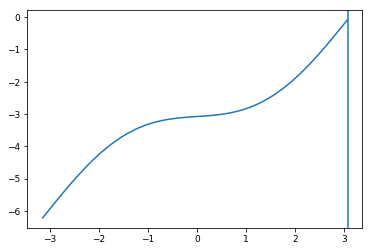

In [175]:
t_test = 500.

E_arr = np.arange(-np.pi, np.pi, 0.1)
f_E = kepler_eqn(E_arr, t_test, 0.9, 1000, 10)

print (2*np.pi/1000)*(t_test - 10)

plt.plot(E_arr,f_E)
plt.axvline((2*np.pi/1000)*(t_test - 10))
plt.show()

## Try solving for E

In [555]:
E = solve_kepler_eqn(np.array([t_test]), 0.9, 1000, 40)

## Plot an orbit!

In [665]:
t_arr = np.arange(0, 1000.+10., 10.)
e, P, t0 = 0.1, 200., 0
i, w, o = 90.0, 00.0, 290.0
m_p = 1.0
m_star = 1.0
d_star = 10.0

In [666]:
execfile('/Users/annaboehle/research/code/orbits/kepler.py')
x_ast, y_ast, rv = orbit_solution(t_arr, e, P, t0, i, w, o, m_p, m_star, d_star, units='AU')

34.8991566115


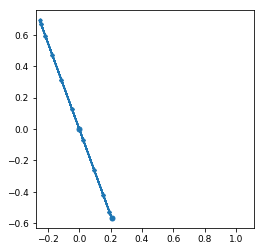

In [667]:
plt.plot(x_ast, y_ast, marker='.')
plt.axis('square')
plt.scatter([0,x_ast[0]],[0,y_ast[0]])
plt.show()

In [668]:
x_3d, y_3d, z_3d = orbit_3d(t_arr, e, P, t0, i, w, o, m_p, m_star, d_star)

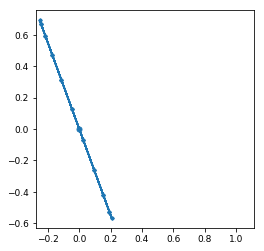

In [669]:
plt.plot(x_3d, y_3d, marker='.')
plt.axis('square')
plt.scatter([0],[0])
plt.show()

Looks like astrometric and full 3d orbit give different answers for projection on the sky...

No typos from the Sagan workshop lecture.

X and Y are switched!  But still, not sure why.

In [670]:
x_ast, y_ast, rv = orbit_solution(t_arr, e, P, t0, i, w, o, m_p, m_star, d_star, units='AU')

34.8991566115


In [671]:
reload(plt_rv)

a = (m_star + (m_p/(const.M_sun/const.M_jup)))**(1./3) *(P/365.)**(2/3.)
a_p = (m_star/(m_star + m_p/(const.M_sun/const.M_jup))) * a
print a, a_p
print

rv_compare = plt_rv.calc_rv_curve(t_arr, m_p, m_star, a_p.value, e, w, i, t0)

0.669827355346 0.669188551813

0.669827487622 0.669188551813
200.000039496
34.8991497197


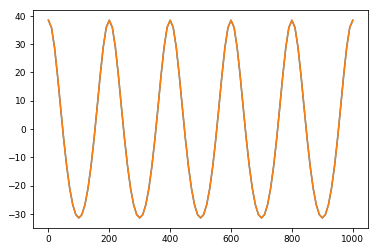

In [674]:
plt.plot(t_arr, rv)
plt.plot(t_arr, rv_compare)

plt.show()

## Angular sep versus f

In [81]:
# try for one semi-major axis
a_p = 50. # 5 AU larger than the project separation
m_p = 1.
m_star = 1.

a = ( ((m_p*954.7919e-6) + m_star) / m_star )*a_p
p = np.sqrt(a**3./(m_star+m_p*954.7919e-6))*365.

In [82]:
sep_meas = 4.0

2000


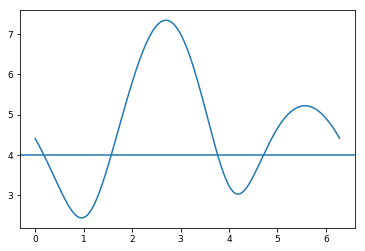

In [83]:
f = np.arange(0, 2*np.pi,0.001*np.pi)
print len(f)
theta = angular_sep(f, 0.2, p, i=90., w=10., m_p=m_p, m_star=m_star, d_star=10.)

plt.plot(f, theta)

plt.axhline(sep_meas)
plt.show()

In [84]:
print theta - sep_meas
print np.where(np.isclose(np.repeat(sep_meas,len(theta)), theta, atol=1e-3, rtol=0.))
print np.min(np.abs(sep_meas-theta))
print np.where( np.abs(sep_meas-theta) == np.min(np.abs(sep_meas-theta)))
print np.argmin(np.abs(sep_meas-theta))

[ 0.40628897  0.39966347  0.39301681 ...,  0.42603753  0.4194761
  0.41289322]
(array([], dtype=int64),)
0.00179849004096
(array([1500]),)
1500


t: [   2389.63178239  106647.96140637  115901.06893685  128212.16670186]


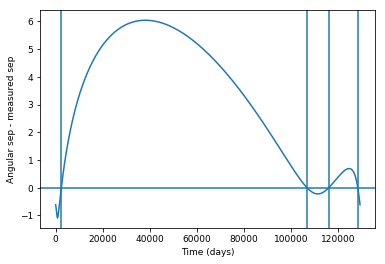

[   2389.63178239  106647.96140637  115901.06893685  128212.16670186] 129170.200585


In [225]:
execfile('/Users/annaboehle/research/code/orbits/kepler.py')
roots = t_from_angularsep(1.3, 0.8, p, t0=0., i=30., w=45.0, m_p=m_p, m_star=m_star, d_star=10., test=True)
print roots, p

true anomaly: [ 1.30585949  3.62798127  3.8690203   5.62855575]


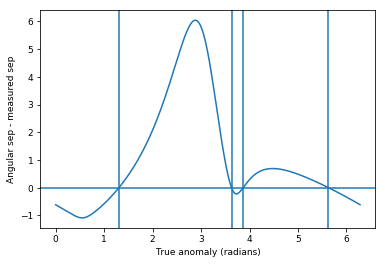

[ 1.30585949  3.62798127  3.8690203   5.62855575]


In [226]:
roots = f_from_angularsep(1.3, 0.8, p, t0=0., i=30., w=45.0, m_p=m_p, m_star=m_star, d_star=10., test=True)
print roots

In [205]:
# test
root = -7.42238948
div = np.floor_divide(root,(2*np.pi))
print div

print root - div*2*np.pi

-2.0
5.14398113436


## test kepler's eqn inverse